## 6.5 Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
# Establishing a path
path = r'/Users/Kate/Documents/Chocolate Bar Ratings Analysis'

In [4]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_cleaned2.csv'), index_col=0)

In [5]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Broad Origin,Cocoa category
0,A. Morin,2016,0.63,France,3.75,Sao Tome,Low Cocoa Mass
1,A. Morin,2015,0.70,France,2.75,Togo,Medium Cocoa Mass
2,A. Morin,2015,0.70,France,3.00,Togo,Medium Cocoa Mass
3,A. Morin,2015,0.70,France,3.50,Togo,Medium Cocoa Mass
4,A. Morin,2015,0.70,France,3.50,Peru,Medium Cocoa Mass


In [6]:
df.rename(columns = {'Broad Origin' : 'Origin', 'Cocoa category': 'Cocoa Category'}, inplace = True)

#### Creating a subset with only numerical data for the k-means algorithm

In [7]:
cluster_subset = df[['Review Date', 'Cocoa Percent', 'Rating' ]]

In [8]:
cluster_subset.head()

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(cluster_subset).score(cluster_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15789.17670885794,
 -4532.831320982332,
 -2165.2456535753054,
 -1449.6632358027846,
 -1026.0931327819442,
 -816.0056109053166,
 -683.25018955362,
 -588.541366645583,
 -521.41682830722]

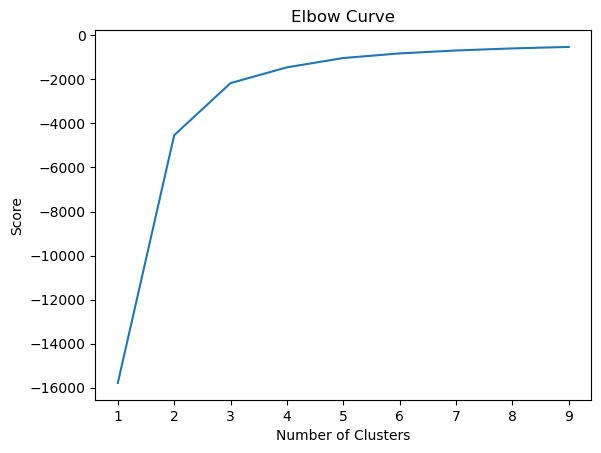

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

### 3. k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(cluster_subset)

KMeans(n_clusters=3)

In [19]:
df['Clusters'] = kmeans.fit_predict(cluster_subset)

In [22]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Origin,Cocoa Category,Clusters
0,A. Morin,2016,0.63,France,3.75,Sao Tome,Low Cocoa Mass,1
1,A. Morin,2015,0.70,France,2.75,Togo,Medium Cocoa Mass,1
2,A. Morin,2015,0.70,France,3.00,Togo,Medium Cocoa Mass,1
3,A. Morin,2015,0.70,France,3.50,Togo,Medium Cocoa Mass,1
4,A. Morin,2015,0.70,France,3.50,Peru,Medium Cocoa Mass,1


In [24]:
df['Clusters'].value_counts()

1    775
0    655
2    365
Name: Clusters, dtype: int64

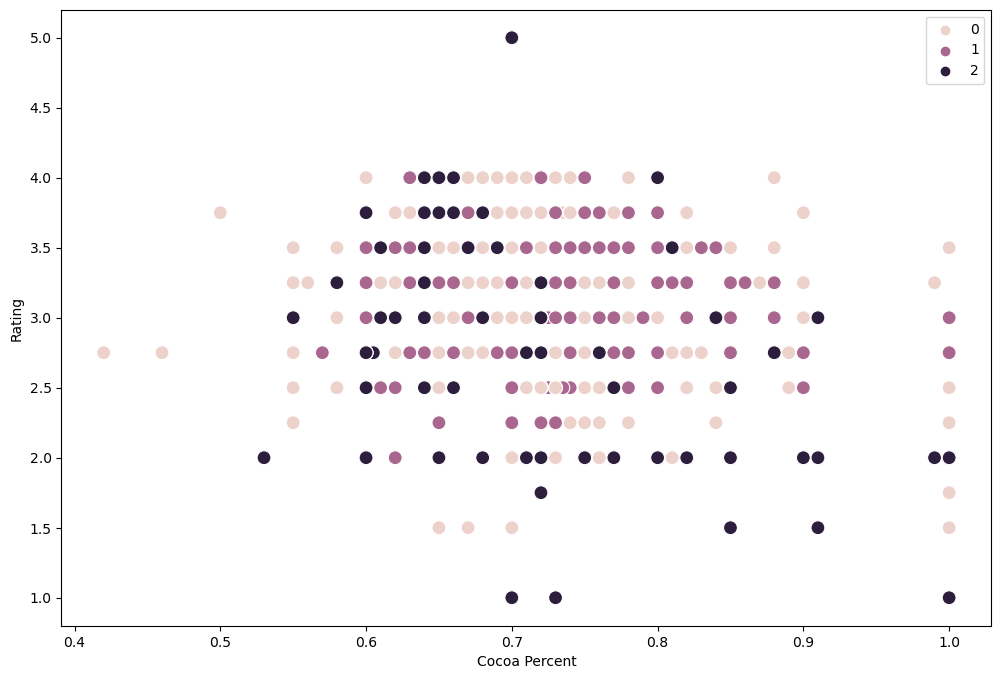

In [26]:
# Plot the clusters for the "Cocoa Percent" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

The clusters here are not seperate, and show no identifiable pattern or groupings. This could mean that the algorithm did not successfully identify meaningful groupings within the data. Since the clusters are based on the review date year, this scatter plot basically shows us that there is a very even mix of when each review happened and the rating & cocoa percent.

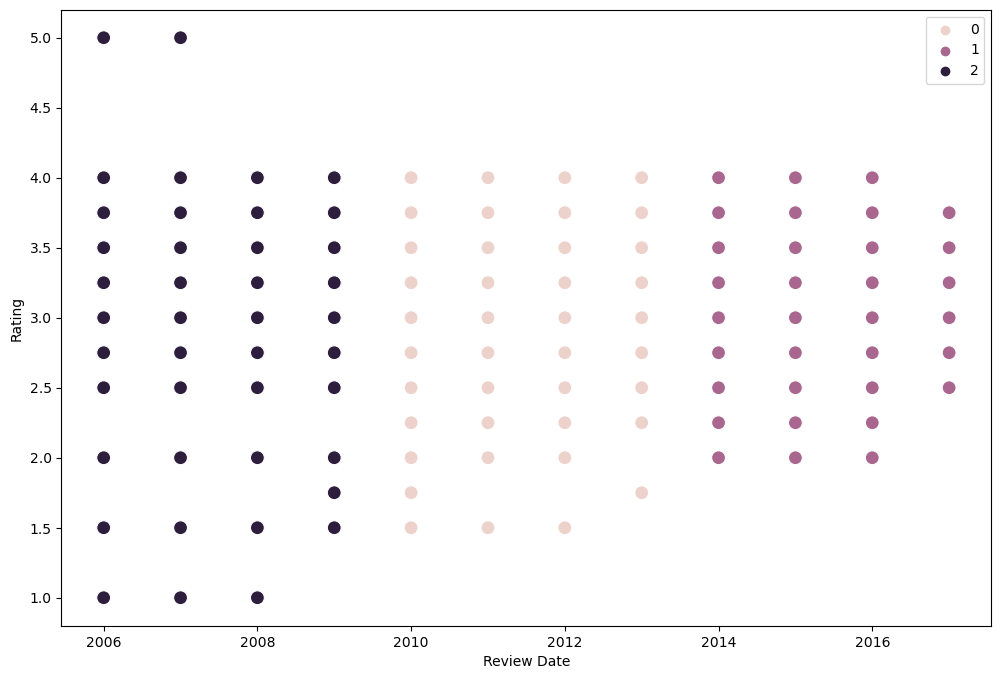

In [27]:
# Plot the clusters for the "Review Date" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Review Date'], y=df['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Date') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

The clusters here are well defined and seperate. This indicates that the k-means algorithm was successful in identifying meaningful groupings within the data.

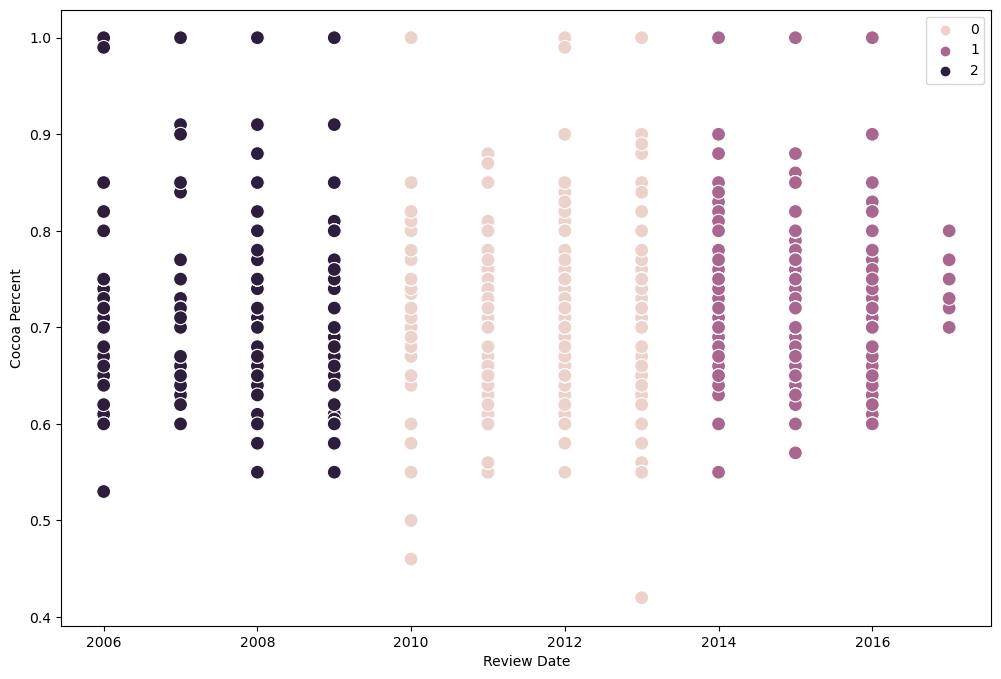

In [29]:
# Plot the clusters for the "Cocoa Percent" and "Review Date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Review Date'], y=df['Cocoa Percent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Date') # Label x-axis.
plt.ylabel('Cocoa Percent') # Label y-axis.
plt.show()

Again, the clusters here are well defined and seperate. This indicates that the k-means algorithm was successful in identifying meaningful groupings within the data.

In [31]:
# Calculating the descriptive statistics for the clusters

df.loc[df['Clusters'] == 2, 'Cluster'] = 'dark purple'
df.loc[df['Clusters'] == 1, 'Cluster'] = 'purple'
df.loc[df['Clusters'] == 0, 'Cluster'] = 'pink'

In [32]:
df.groupby('Cluster').agg({'Review Date':['mean', 'median'], 
                         'Cocoa Percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Review Date         Cocoa Percent           Rating       
                    mean  median          mean median      mean median
Cluster                                                               
dark purple  2007.731507  2008.0      0.714644    0.7  3.082192   3.00
pink         2011.690076  2012.0      0.714679    0.7  3.198092   3.25
purple       2015.025806  2015.0      0.720032    0.7  3.224516   3.25

In [33]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Origin,Cocoa Category,Clusters,Cluster
0,A. Morin,2016,0.63,France,3.75,Sao Tome,Low Cocoa Mass,1,purple
1,A. Morin,2015,0.70,France,2.75,Togo,Medium Cocoa Mass,1,purple
2,A. Morin,2015,0.70,France,3.00,Togo,Medium Cocoa Mass,1,purple
3,A. Morin,2015,0.70,France,3.50,Togo,Medium Cocoa Mass,1,purple
4,A. Morin,2015,0.70,France,3.50,Peru,Medium Cocoa Mass,1,purple


#### Results

It appears that the k-means algorithm based the clusters on the "Review Date," as it is easy to identify from my last two scatterplots that the clusters are grouped by year. This is also evident in the descriptive statistics for the clusters. However, I don't think this provides any useful information for my analysis. Since my hypothesis is based on how "Rating" and "Cocoa Percent" interact with each other, the year of the review date isn't very important to me. But it could possibly be useful later on, possibly when doing a time series analysis. 

In [34]:
# Exporting df with clusters

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_clusters.csv'))